In [1]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 9 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 9 
Number of the dataset : 3



In [2]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

In [4]:
import random

# Get the list of edges
edges = list(facebook_network.edges)

# Randomly select 10% of edges to delete
num_edges_to_delete = int(0.1 * len(edges))
edges_to_delete = random.sample(edges, num_edges_to_delete)

# Remove the selected edges
facebook_network.remove_edges_from(edges_to_delete)


In [5]:
# Extract features only for edges present in the graph
features = dict(facebook_network.degree())
features = {edge: features[edge[0]] for edge in facebook_network.edges}
features = list(features.values())  # Convert dictionary values to a list
features = [[d] for d in features]  # Reshape to a 2D list (required for sklearn)

# Create a target vector indicating whether an edge was deleted or not
target = [1 if edge in edges_to_delete else 0 for edge in facebook_network.edges]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # You can choose any ML model

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the machine learning model
model = RandomForestClassifier()  # You can use any classifier
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, roc_curve  

# Ensure that the dimensions of y_test and y_pred match
y_test = y_test[:len(predictions)]

# Check if both classes are present in y_true
unique_classes = np.unique(y_test)
if len(unique_classes) == 1:
    # Handle the case when only one class is present
    print("Only one class present in y_true. Cannot calculate ROC AUC.")
    auroc = None
else:
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    auroc = roc_auc_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)

Only one class present in y_true. Cannot calculate ROC AUC.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


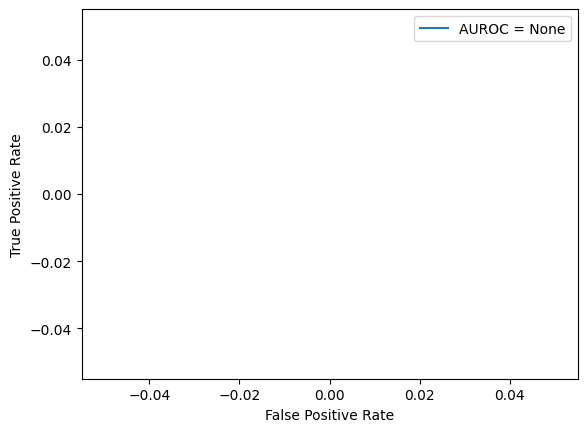

Accuracy: 1.00
AUROC: None
Precision: 0.00


In [19]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, label=f'AUROC = {auroc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Output the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'AUROC: {auroc}')
print(f'Precision: {precision:.2f}')